<a href="https://colab.research.google.com/github/YunSeoHwan/My-own-study-repository/blob/main/8-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **가중치 시각화**

In [25]:
from tensorflow import keras
!wget https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.h5
model = keras.models.load_model('best-cnn-model.h5')

--2021-08-01 13:46:23--  https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.h5
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.h5 [following]
--2021-08-01 13:46:23--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4044200 (3.9M) [application/octet-stream]
Saving to: ‘best-cnn-model.h5.3’

best-cnn-model.h5.3 100%[===================>]   3.86M  --.-KB/s    in 0.1s    

2021-08-01 13:46:23 (26.0 MB/s) - ‘best-cnn-model.h5.3’ saved [4044200/4044200]



In [8]:
model.layers

In [10]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [11]:
# 평균 표준편차 출력
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.03802128 0.27455312


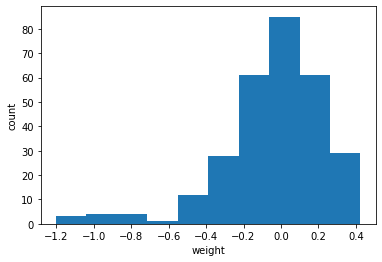

In [13]:
# 가중치 분포도 히스토그램
import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

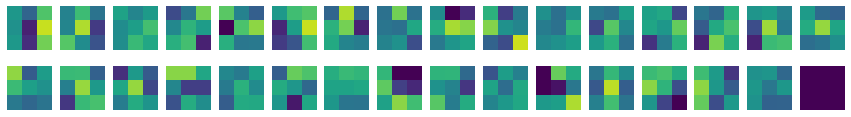

In [14]:
# 3*3 커널 32개 시각화
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

In [19]:
# 빈 합성곱 신경망
no_training_model = keras.Sequential()

no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [20]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [22]:
# 평균, 표준편차
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

0.005510668 0.08527399


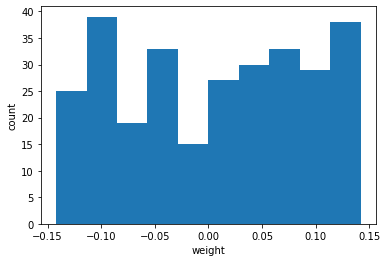

In [23]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

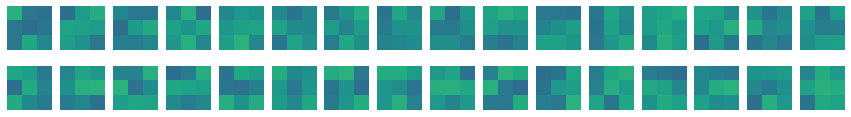

In [24]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()